modified from https://blog.naver.com/ckdgus1433/221443838135

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# 데이터 정규화 및 Reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_x_train = shrink(x_train, 14, 14)
reduced_x_test = shrink(x_test, 14, 14)
print(reduced_x_train.shape)
print(reduced_x_test.shape)


(60000, 14, 14)
(10000, 14, 14)


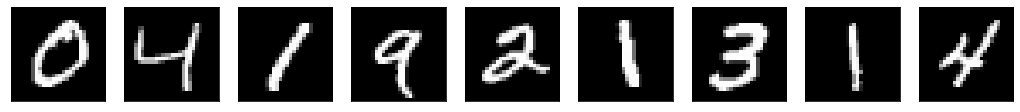

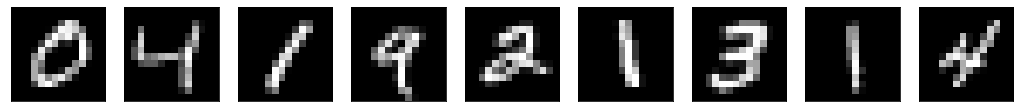

In [5]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
reduced_x_train = reduced_x_train.reshape(reduced_x_train.shape[0], 14*14)
reduced_x_test = reduced_x_test.reshape(reduced_x_test.shape[0], 14*14)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [7]:
print(reduced_x_train.shape)
print(x_train.shape)
print(reduced_x_test.shape)
print(x_test.shape)

(60000, 196)
(60000, 784)
(10000, 196)
(10000, 784)


In [10]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_x_train, x_train, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0640 - val_loss: 0.0370
Epoch 2/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0322 - val_loss: 0.0283
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0258 - val_loss: 0.0231
Epoch 4/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0214 - val_loss: 0.0196
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0189 - val_loss: 0.0178
Epoch 6/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0172 - val_loss: 0.0163
Epoch 7/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0155
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0152 - val_loss: 0.0145
Epoch 9/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 10/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0135

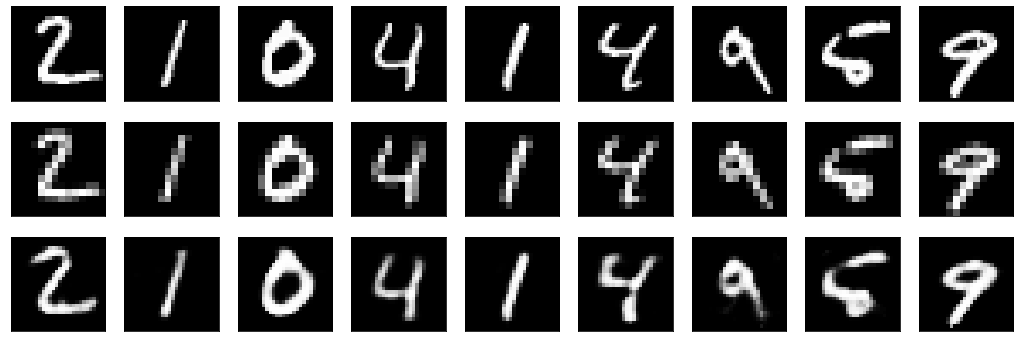

In [9]:
# 결과 확인
super_resolutioned = model.predict(reduced_x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_x_test[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()